# **Introduction**

Traffic accidents poses a serious challenge to authorities in Saudi Arabia attempting to tackle this issue and reduce the number of accidents as well as fatalities caused by these accidents. To tackle this challenge, one has to make sense of the vast amount of data collected from each accident. The ultimate target is to find patterns that can help the authorities come up with solutions.

This notebooks illustrate the work that has been done to analyze the data for Thankaa Traffic Safety challenge.



In [290]:
# importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import datetime
import seaborn as sns

%matplotlib inline

In [291]:
# Reading in the data
data = pd.read_csv('Accidents.csv')

# Data Understanding

In the following cells: I check the correlation between the numerical features, figure out the number of accidents as well as the number of features present. Then I move to survey the data.

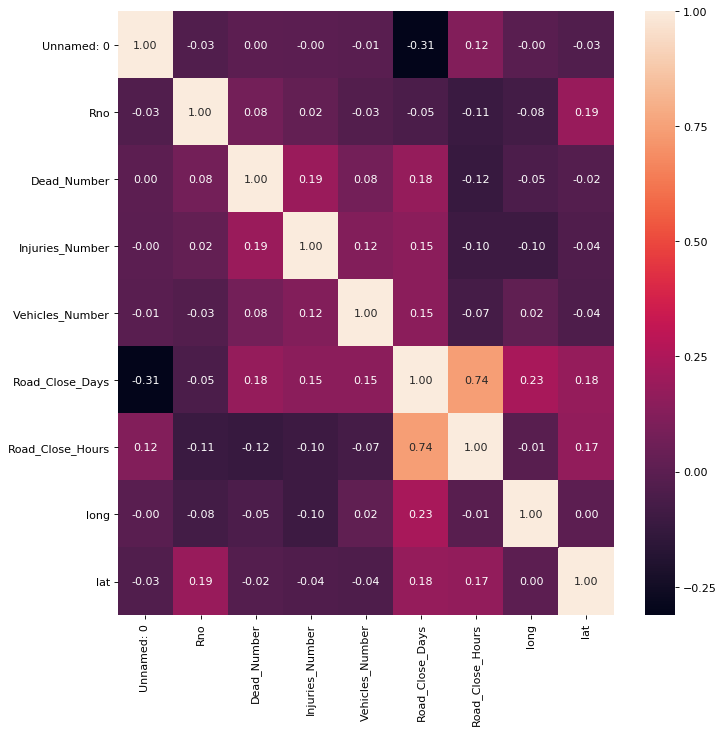

In [307]:
def corrViz(df):
    """ A function that visualize the correlation between the numeric features in the dataset
    """    
    
    lst = []
    for item in df.columns:
        if np.issubdtype(df[item].dtype, np.number) and len(df[item].value_counts())!=1:
            lst.append(item)
#             print(df[item].value_counts())
    plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
    sns.heatmap(df[lst].corr(), annot= True, fmt= '.2f')

corrViz(data)
            

In [251]:
len(lst)

22

In [282]:
data.dtypes[data.dtypes == np.object0].count()

9

In [283]:
def dataTypes(data):
    """ A function that prints number of feature for all present encoding type
    """
    for item in list(data.dtypes.unique()):
        print(item, data.dtypes[data.dtypes == item].count())
        
dataTypes(data)        

int64 2
object 9
float64 17


In [229]:
# number of accidents and number of features
data.shape

(36016, 28)

In [286]:
data.describe()

,Unnamed: 0,Rno,Dead_Number,Injuries_Number,Car,Small_Truck,Big_Truck,Other_Car,Driver,Way,Vehicle,Animal,Vehicles_Number,Paints,Eyes,Road_Close_Days,Road_Close_Hours,long,lat
count,36016.000000,36016.000000,24727.000000,29384.000000,24219.0,4958.0,7949.0,333.0,27286.0,215.0,5836.0,418.0,33660.000000,35769.0,35762.0,96.000000,228.000000,27629.000000,27629.000000
mean,18007.500000,1039.309557,0.184818,1.006058,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.490137,1.0,1.0,20.802083,1.016009,42.983266,24.200144
std,10397.067984,2309.320528,0.621456,1.623716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.858436,0.0,0.0,7.880181,1.246447,3.486321,3.054086
min,0.000000,5.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0,1.000000,0.050000,34.801405,16.444880
25%,9003.750000,40.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,15.000000,0.200000,39.953890,22.426535
50%,18007.500000,70.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,20.000000,0.500000,42.759093,24.530719
75%,27011.250000,500.000000,0.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,1.0,25.000000,1.000000,45.941974,26.161332
max,36015.000000,9606.000000,21.000000,150.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,52.000000,1.0,1.0,45.000000,8.000000,52.517314,31.680048


In [6]:
data.head()

,Unnamed: 0,Accident_Time,Accident_Date_G,Rno,Road_Type,Region,Road_Status,Weather_Status,Dead_Number,Injuries_Number,...,Vehicle,Animal,Vehicles_Number,Paints,Eyes,Road_Close_Days,Road_Close_Hours,GEOMETRIC_RoadTYPE,long,lat
0,0,5:00 AM,16/04/2019,425,سريع مع خدمة,Qassim,Good,good,0.0,1.0,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,Straight link,43.999093,26.426746
1,1,12:15 PM,16/04/2019,414,مزدوج,Qassim,Good,good,0.0,1.0,...,NaN,NaN,2.0,1.0,1.0,NaN,NaN,Straight link,43.786877,26.057596
2,2,8:30 AM,15/04/2019,419,مزدوج,Qassim,Good,good,0.0,0.0,...,NaN,NaN,2.0,1.0,1.0,NaN,NaN,Straight link,43.772701,26.345146
3,3,8:30 PM,15/04/2019,60,سريع مع خدمة,Qassim,Good,good,0.0,0.0,...,NaN,NaN,2.0,1.0,1.0,NaN,NaN,Straight link,43.937996,26.205702
4,4,12:10 AM,14/04/2019,393,NaN,Hail,Good,good,NaN,NaN,...,NaN,NaN,2.0,1.0,1.0,NaN,NaN,Straight link,41.702023,27.555157


The following cell lists all the features present in the dataset

In [197]:
for col in data.columns:
    print(col)

Unnamed: 0
Accident_Time
Accident_Date_G
Rno
Road_Type
Region
Road_Status
Weather_Status
Dead_Number
Injuries_Number
Damage_Road_Type
Accident_Type
Car
Small_Truck
Big_Truck
Other_Car
Driver
Way
Vehicle
Animal
Vehicles_Number
Paints
Eyes
Road_Close_Days
Road_Close_Hours
GEOMETRIC_RoadTYPE
long
lat
hour


The following two cells are a quicklook into the road_type feature

In [8]:
data.Road_Type.value_counts()

سريع            14332
مزدوج           12053
مفرد             6881
عقبة              268
سريع مع خدمة      210
سريع اتجاهين       54
Name: Road_Type, dtype: int64

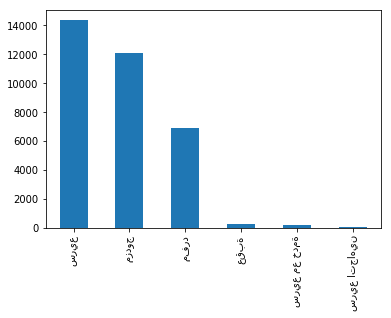

In [9]:
data.Road_Type.value_counts().plot(kind="bar");

Quicklook into Accident_Type

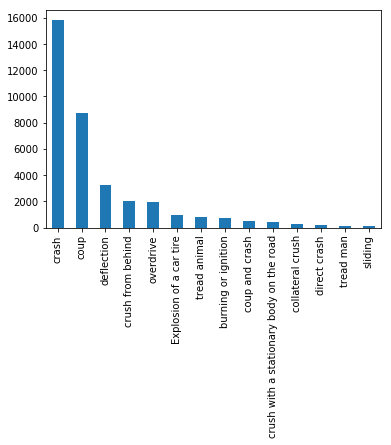

In [10]:
data.Accident_Type.value_counts().plot(kind="bar");

In [302]:
def howMuchMissing(data):
    lst = []
    lst1 = []
    for item in data.columns:
        lst.append(item)
        lst1.append(data[item].isnull().sum())
    x = pd.DataFrame(lst, lst1, columns={'feature'})
    x.rename_axis('NaN_count', inplace= True)
    return x

howMuchMissing(data)

,feature
NaN_count,
0,Unnamed: 0
0,Accident_Time
0,Accident_Date_G
0,Rno
2218,Road_Type
0,Region
14178,Road_Status
447,Weather_Status
11289,Dead_Number


In [305]:
data.Vehicle.value_counts()

1.0    5836
Name: Vehicle, dtype: int64

The dataset continue information for 36,016 accidents and 28 features for each accident. Two out of the 28 are unique identification number and an index number and therefore add little value in gaining any insight from the data. Not counting these two, we have 7 numerical features, 9 categorical features and 10 binary features. The binary features seem to have a high number of NaN but that is due to the fact that it can be either 1 if applicable or NaN if not.

# Accidents Time - Data Preparation

The cells in this section looks at the timing of the accidents in term of hour of day, day of week and month and the preparation needed to change the data from a string to a datetime object that can be minpulated and even divided into multiple features for year, month and day of week.

In [35]:
def convertToDate(dateString):
    """
    this function as well as the next few cells are used to convert the date from a string into a datetime object
    """
    return datetime.date(int(dateString.split('/')[2]), int(dateString.split('/')[1]), int(dateString.split('/')[0]))

In [48]:
def accidentsDateData(df):
    """ A function that put together accidents that share the same date
    """
    dates = pd.DataFrame(df.Accident_Date_G.value_counts().index, df.Accident_Date_G.value_counts(), columns=['date'])
    dates.reset_index(inplace=True)
    dates.rename(columns={"Accident_Date_G": "Number_of_Accidents"}, inplace=True)
    dates['date'] = dates['date'].apply(convertToDate)
    # Now that they are datetime objects we can sort pert date
    dates.sort_values(by= 'date', inplace=True)
    dates.reset_index(inplace=True)
    dates.drop(['index'],inplace=True, axis=1)
    return dates

In [49]:
#  number of accident for each day
dates = accidentsDateData(data)

In [51]:
#  a quicklook at how the data look like now
dates.head()

,Number_of_Accidents,date
0,63,2017-01-01
1,45,2017-01-02
2,39,2017-01-03
3,51,2017-01-04
4,55,2017-01-05


In [57]:
def datetimeToYearMonthDayOfWeek(df):
    """ A function that takes the datetime column and returns three columns: Year, Month and Day of the week
    """
    lst, lst1, lst2 = [], [], []
    for date in df.date:
        lst.append(date.weekday())
        lst1.append(date.month)
        lst2.append(date.year)
    
    df['day'] = lst
    df['month'] = lst1
    df['year'] = lst2
    
    # This is needed to change the days from a numeric value into string
    day_mapper = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
    df.replace({"day": day_mapper}, inplace= True)
    
    return df
    

In [60]:
dates = datetimeToYearMonthDayOfWeek(dates)

In [61]:
dates.head(n=10)

,Number_of_Accidents,date,day,month,year
0,63,2017-01-01,Sunday,1,2017
1,45,2017-01-02,Monday,1,2017
2,39,2017-01-03,Tuesday,1,2017
3,51,2017-01-04,Wednesday,1,2017
4,55,2017-01-05,Thursday,1,2017
5,30,2017-01-06,Friday,1,2017
6,55,2017-01-07,Saturday,1,2017
7,44,2017-01-08,Sunday,1,2017
8,41,2017-01-09,Monday,1,2017
9,43,2017-01-10,Tuesday,1,2017


The first visualization that we generate is of number of accidents per each day starting from January 2017 to April 2019. This shows a slightly declining trend.

Text(0.5, 0, 'Day')

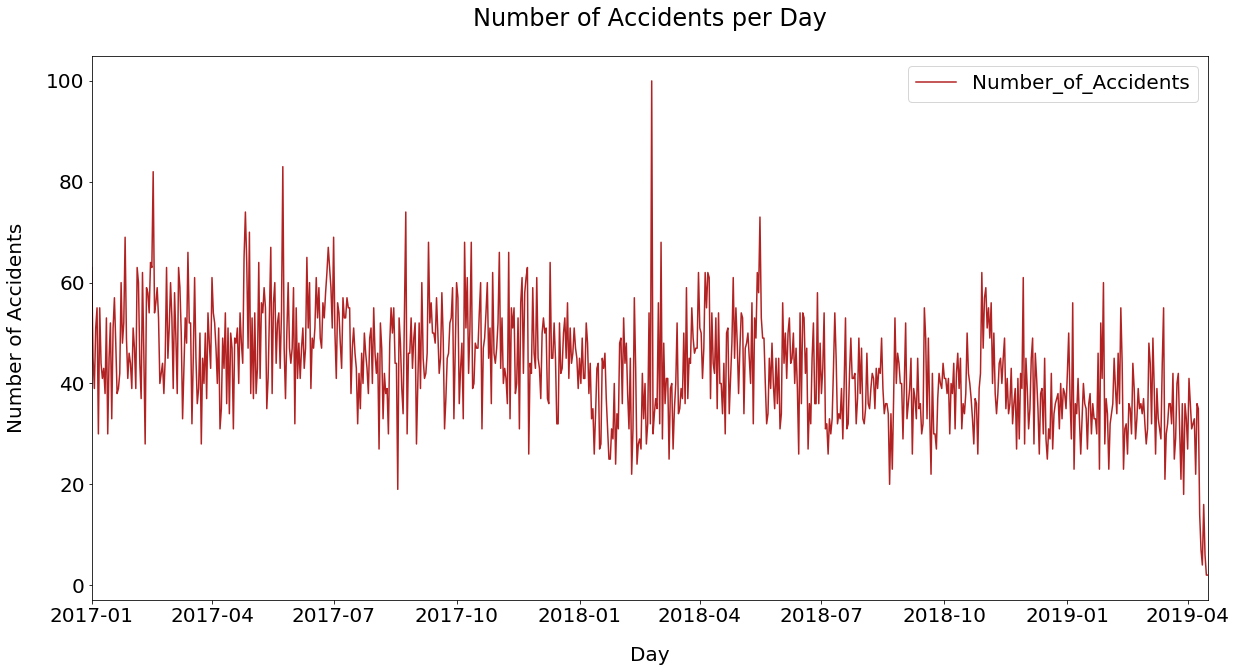

In [226]:
dates.plot('date','Number_of_Accidents', figsize=[20, 10], color= 'firebrick');
plt.title('Number of Accidents per Day', pad=30)
plt.ylabel('Number of Accidents', labelpad=20)
plt.xlabel('Day', labelpad=20)

Now we move to investigate the number of accidents per year and month. It is evident that the number of accidents in 2017 is the highest and in 2019 the lowest. The lower number of accidents in 2019 however is due to sampling as we have the data for only four months

In [227]:
accidents_day = dates.drop(["date"], axis=1)

In [228]:
accidents_day.drop(['day', 'month'], axis=1).groupby("year").sum()

,Number_of_Accidents
year,
2017,17632
2018,14842
2019,3542


The next graph shows the number of accidents per month in these two+ years. This is misleading as the lower number seen for the months after april is due to the data being limited to the end of April 2019. This is also does not account for how many Januarys are in the sample.

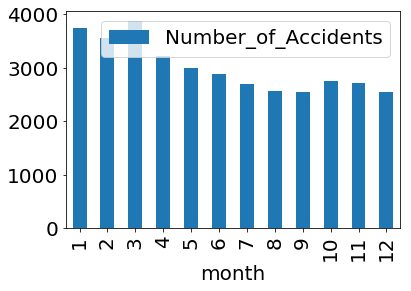

In [229]:
accidents_day.drop(['day', 'year'], axis=1).groupby("month").sum().plot(kind='bar')

The next graph adjusts for this sampling issue by showing only the results for 2017-2018

In [230]:
accidents_no_2019 = accidents_day[accidents_day['year'] != 2019]

Text(0.5, 0, 'Month')

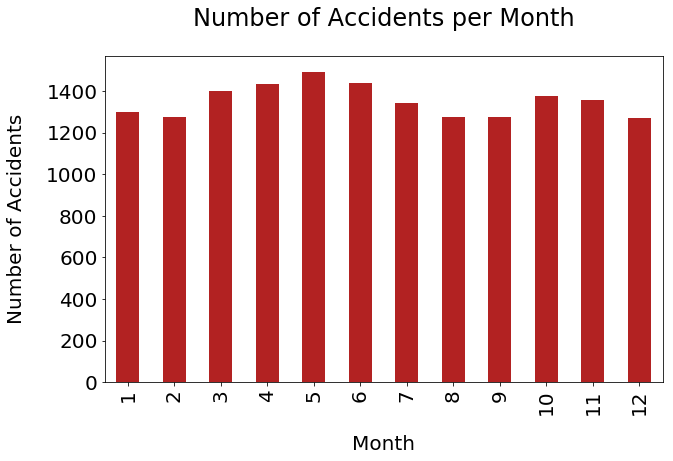

In [235]:
tmp = accidents_no_2019.drop(['day', 'year'], axis=1).groupby("month").sum()/2
tmp.plot(kind='bar', figsize=[10, 6], legend= False, color= 'firebrick')
plt.title('Number of Accidents per Month', pad=30)
plt.ylabel('Number of Accidents', labelpad=20)
plt.xlabel('Month', labelpad=20)

In the next cell, we see how many accidents occured in each day of the week. A drop in the number of accidents is seen on Friday which is the first day of the weekend in Saudi Arabia.

Text(0.5, 0, 'Day')

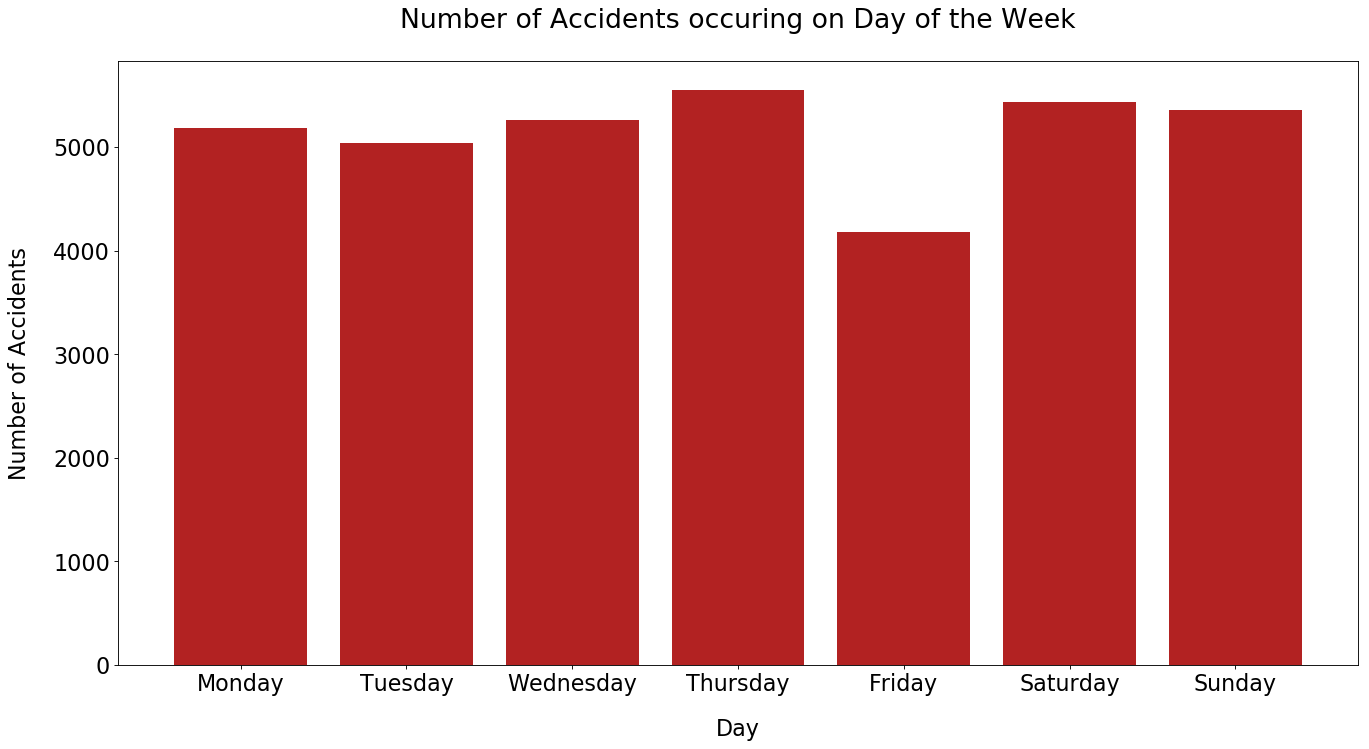

In [237]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],accidents_day.drop(['month', 'year'], axis=1).groupby("day").sum().Number_of_Accidents, color= 'firebrick')
plt.title('Number of Accidents occuring on Day of the Week', pad=30)
plt.ylabel('Number of Accidents', labelpad=20)
plt.xlabel('Day', labelpad=20)

This next part focuses on the time during the day at which accidents occured.

In [180]:
def timeToHour(df):
    """ a function that takes the accident time and convert it to the nearest hour
    """
    lst = []
    for item in pd.to_datetime(df.Accident_Time):
        if item.minute<=30:
            lst.append(item.hour)
        elif item.minute>30 and item.hour==23:
            lst.append(0)
        else:
            lst.append(item.hour+1)
    df['hour'] = lst
    return df
            

In [181]:
data = timeToHour(data)

In [182]:
data.head(n=10)

,Unnamed: 0,Accident_Time,Accident_Date_G,Rno,Road_Type,Region,Road_Status,Weather_Status,Dead_Number,Injuries_Number,...,Animal,Vehicles_Number,Paints,Eyes,Road_Close_Days,Road_Close_Hours,GEOMETRIC_RoadTYPE,long,lat,hour
0,0,5:00 AM,16/04/2019,425,سريع مع خدمة,Qassim,Good,good,0.0,1.0,...,NaN,1.0,1.0,1.0,NaN,NaN,Straight link,43.999093,26.426746,5
1,1,12:15 PM,16/04/2019,414,مزدوج,Qassim,Good,good,0.0,1.0,...,NaN,2.0,1.0,1.0,NaN,NaN,Straight link,43.786877,26.057596,12
2,2,8:30 AM,15/04/2019,419,مزدوج,Qassim,Good,good,0.0,0.0,...,NaN,2.0,1.0,1.0,NaN,NaN,Straight link,43.772701,26.345146,8
3,3,8:30 PM,15/04/2019,60,سريع مع خدمة,Qassim,Good,good,0.0,0.0,...,NaN,2.0,1.0,1.0,NaN,NaN,Straight link,43.937996,26.205702,20
4,4,12:10 AM,14/04/2019,393,NaN,Hail,Good,good,NaN,NaN,...,NaN,2.0,1.0,1.0,NaN,NaN,Straight link,41.702023,27.555157,0
5,5,5:30 AM,14/04/2019,425,سريع مع خدمة,Qassim,Good,good,0.0,0.0,...,NaN,2.0,1.0,1.0,NaN,NaN,Straight link,43.892628,26.392240,5
6,6,11:45 AM,14/04/2019,70,NaN,Hail,Good,good,NaN,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,Straight link,41.459306,27.335198,12
7,7,2:30 PM,14/04/2019,8700,NaN,Hail,Good,good,NaN,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,Straight link,41.790092,27.713433,14
8,8,4:50 PM,14/04/2019,8010,مفرد,Madina,Cracks and fossils,good,NaN,1.0,...,NaN,2.0,1.0,1.0,NaN,0.25,Straight link,40.808341,23.454074,17
9,9,10:30 PM,14/04/2019,418,مزدوج,Qassim,Good,good,0.0,1.0,...,NaN,2.0,1.0,1.0,NaN,NaN,4-Leg intersection,NaN,NaN,22


In [183]:
value_counts = data.hour.value_counts()

In [184]:
accidents_by_hour = value_counts.rename_axis('hours').reset_index(name='counts')

In [185]:
accidents_by_hour.head()

,hours,counts
0,8,2124
1,9,1992
2,10,1877
3,11,1843
4,12,1828


In [186]:
accidents_by_hour.sort_values(by=['hours'], inplace=True)

In [187]:
accidents_by_hour.head()

,hours,counts
23,0,966
18,1,1192
20,2,1052
21,3,1014
22,4,1000


In [188]:
accidents_by_hour.reset_index(inplace=True)

In [189]:
accidents_by_hour.drop(['index'], axis=1, inplace=True)

In [190]:
accidents_by_hour.head()

,hours,counts
0,0,966
1,1,1192
2,2,1052
3,3,1014
4,4,1000


This first graph shows the varying number of accidents that occured at each hour.

Text(0.5, 0, 'Hour')

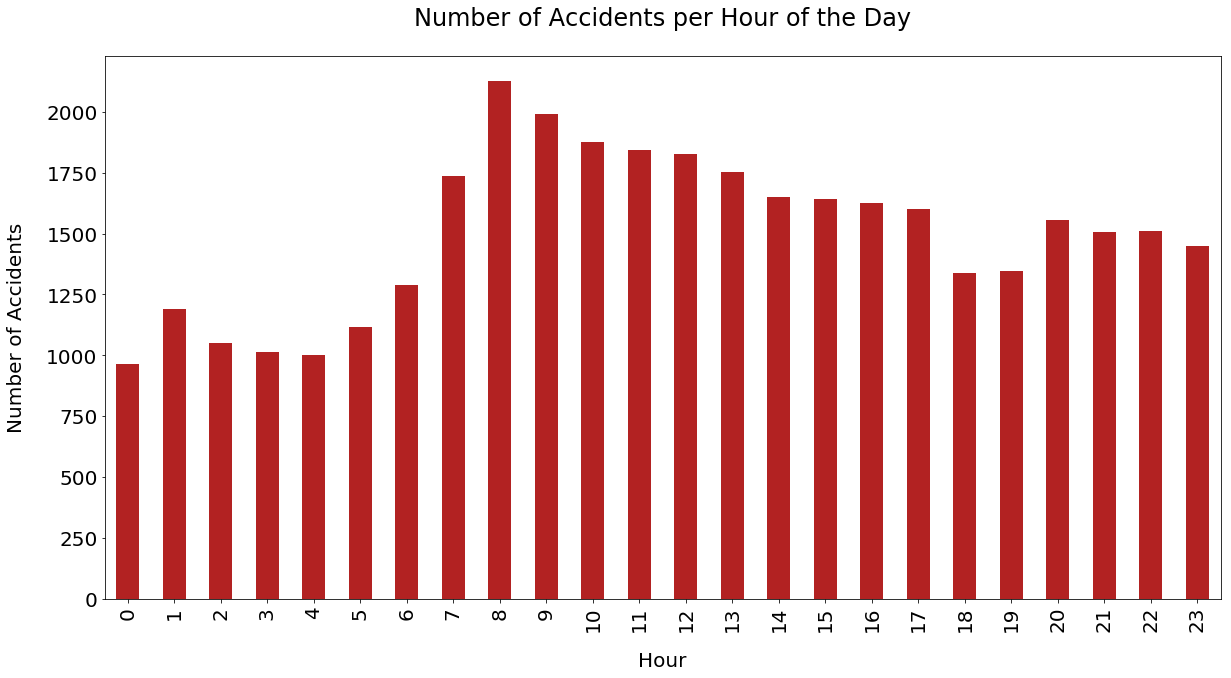

In [195]:
accidents_by_hour.counts.plot(kind="bar", figsize= [20, 10], legend= False, color= 'firebrick')
plt.title('Number of Accidents per Hour of the Day', pad=30)
plt.ylabel('Number of Accidents', labelpad=20)
plt.xlabel('Hour', labelpad=20)

# Accidents Time - Interpretation

The first visualzation shows an overall declining trend from the start of 2017 till 2019. The investigation into the months showed that there is a peak period from March to June. Investigating the hour of day, showed that traffic accidents peak at 8 am and decline throughout the afternoon until the evening. The early hours of the morning (12-5 am) are the lowest in terms of number of traffic accidents.

# Accidents Location

Minimal data preparation has been done for this part since the region, longitude and latitude are features in the right format in the raw dataset.
The following section explores the geographical location of the accidents and accidents with fatality.

The following cell is a more elaborate attempt at visualizing the number of accidents per region

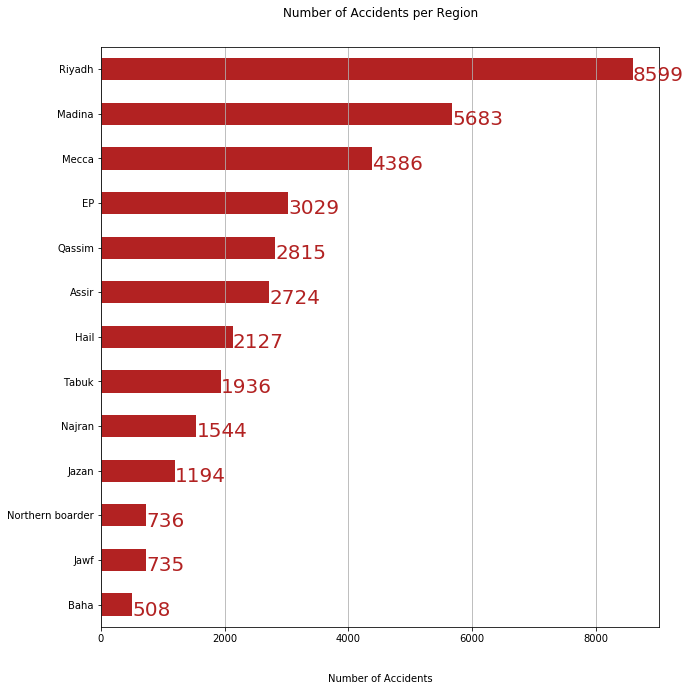

In [194]:
fig, ax = plt.subplots()  
plt.title('Number of Accidents per Region', pad=30)
plt.xlabel('Number of Accidents', labelpad=30)
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)
data.Region.value_counts().plot(kind='barh', figsize= [10, 10], color= 'firebrick')
plt.gca().invert_yaxis()

# this is to annotate the number of accidents next to each bar
for i, v in enumerate(data.Region.value_counts()):
    ax.text(v + 3, i + .25, str(v), color='firebrick', fontweight='normal')
ax.xaxis.grid()
    
fig.tight_layout()


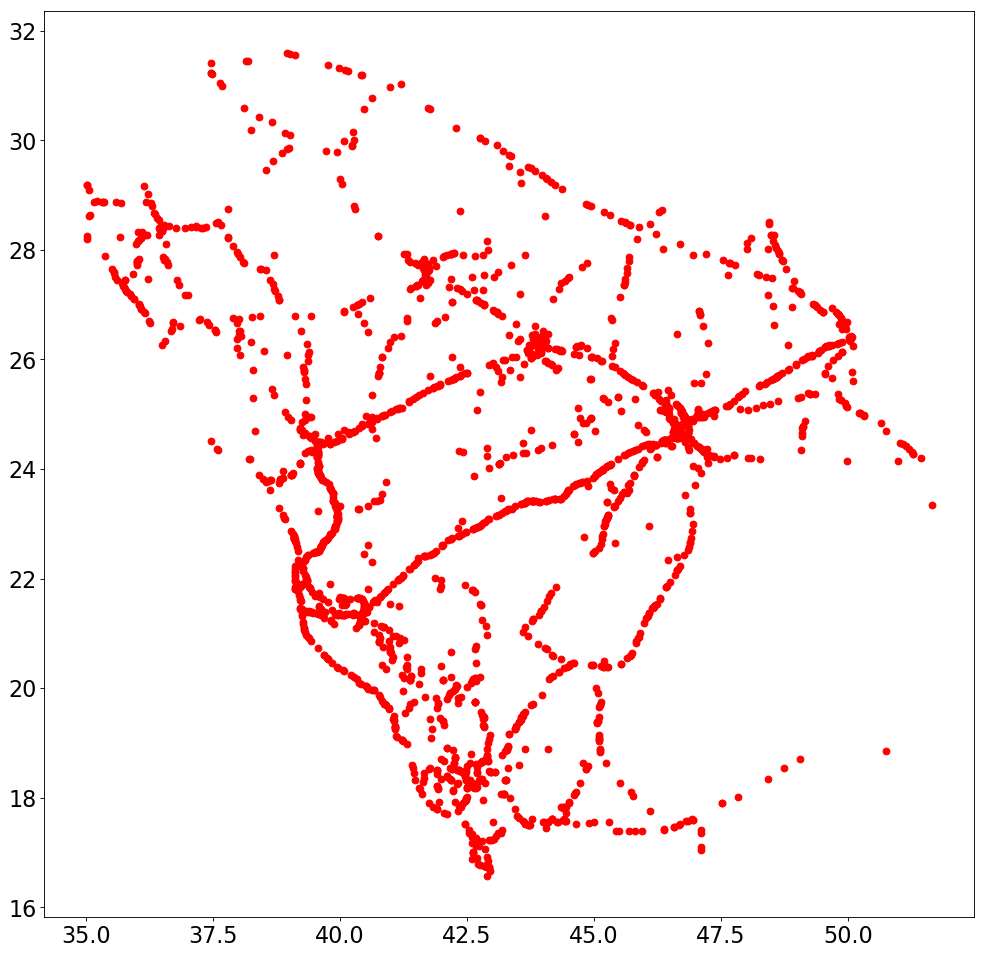

In [252]:
data_with_coor = data[~data.long.isnull()]
data_with_coor_and_fatality = data_with_coor[data_with_coor.Dead_Number>0]
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data_with_coor_and_fatality.long, data_with_coor_and_fatality.lat, color='r');

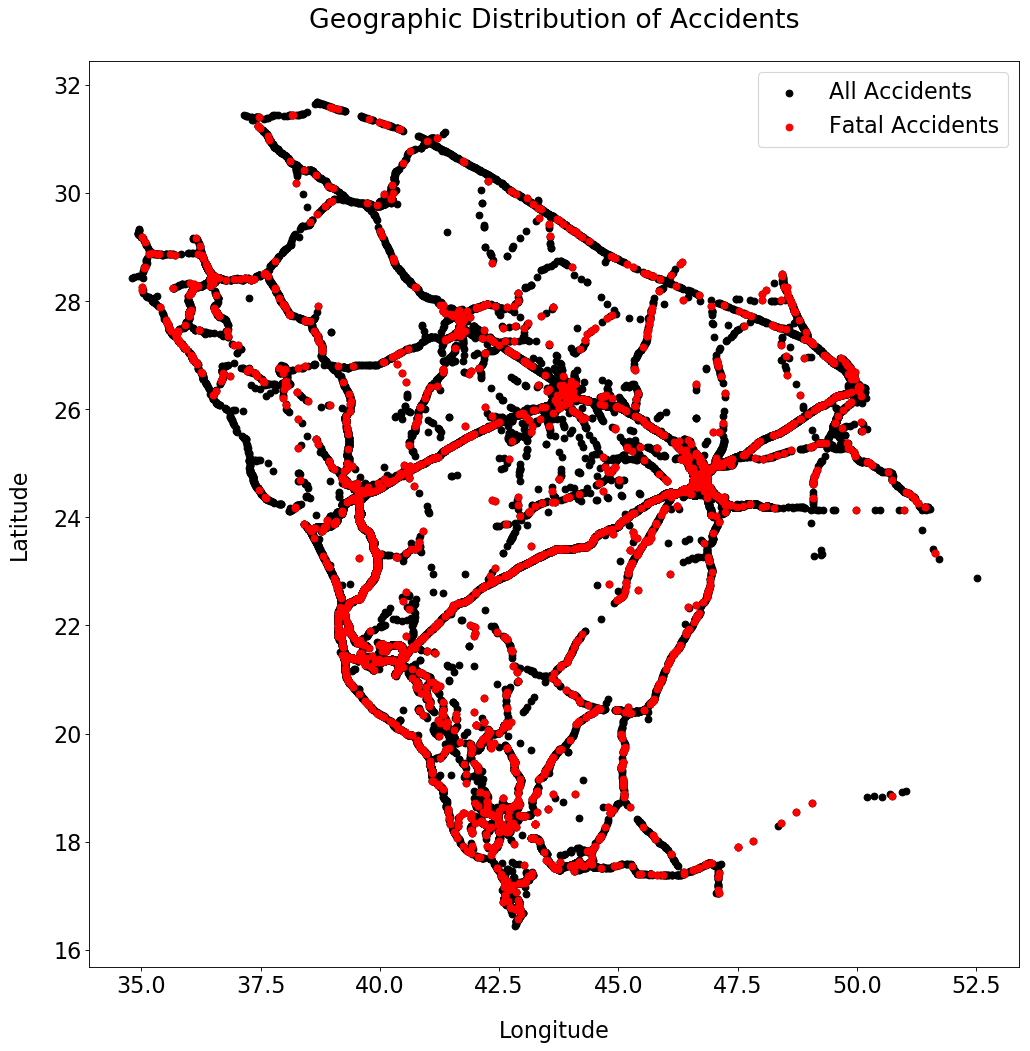

In [58]:
# fig, ax = plt.subplots()  

plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(data[~data.long.isnull()].long, data[~data.long.isnull()].lat, color='k', label='All Accidents')
plt.scatter(data_with_coor_and_fatality.long, data_with_coor_and_fatality.lat, color='r', label='Fatal Accidents');
plt.title('Geographic Distribution of Accidents', pad=30)
plt.ylabel('Latitude', labelpad=20)
plt.xlabel('Longitude', labelpad=20)
plt.legend(loc='upper right')
# plt.ylim(-1.5, 2.0)
plt.show()

The below cell explores the causes for these accidents. Unfortunately, the majority of accidents are attributed to the driver

Text(0.5, 0, 'Causes')

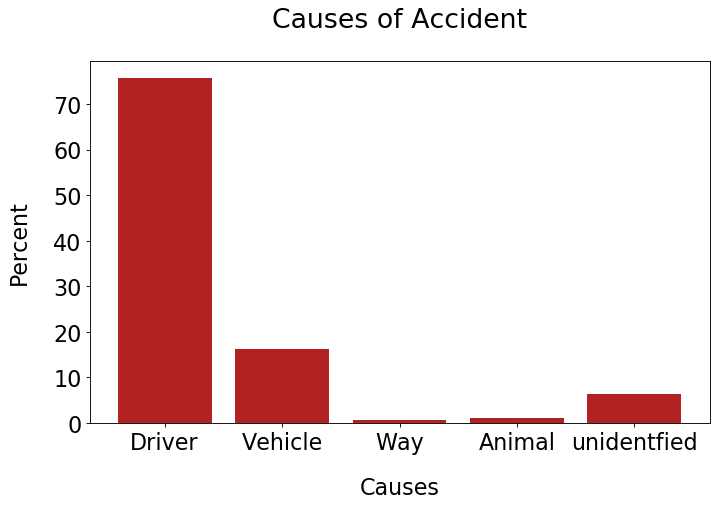

In [167]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
lst = [data.Driver.sum(), data.Vehicle.sum(), data.Way.sum(), data.Animal.sum(), data.shape[0]-sum([data.Driver.sum(), data.Vehicle.sum(), data.Way.sum(), data.Animal.sum()])]
plt.bar(['Driver', 'Vehicle', 'Way', 'Animal', 'unidentfied'], [item*100 for item in lst]/sum(lst), color='firebrick')
plt.title('Causes of Accident', pad=30)
plt.ylabel('Percent', labelpad=20)
plt.xlabel('Causes', labelpad=20)

Looking at the number of accidents per region, it total number of accidents in the top 3 regions exceed the sum of all other accidents. This shows that these regions require an extra attention when trying to tackle this issue. This probably due to population density. The distribution of these accidents on the map show that they occuer everywhere. The accidents with fatality are less widespread and might provide areas that requires more attention. The last graph shows that the majority of these accidents are attributed to the driver and that any measure that attempt to reduce the number of accident should be driver-oriented.